In [37]:
set_verbose(-2)

In [25]:
set_verbose(2)

In [1]:
E = EllipticCurve("389.a1")
print E
L = E.lseries().dokchitser(algorithm='gp')
print L

Elliptic Curve defined by y^2 + y = x^3 + x^2 - 2*x over Rational Field
Dokchitser L-function associated to Elliptic Curve defined by y^2 + y = x^3 + x^2 - 2*x over Rational Field


In [2]:
m = lambda z: sum(an * z^(n) for n, an in enumerate(E.anlist(2000)[1:]))

In [3]:
mellin_forward = lambda s: 1/gamma(s) * numerical_integral(lambda x: x^(s - 1) * exp(-x) * m(exp(-x)), 0, 100, max_points = 10000)[0]

In [4]:
L(4)

0.854824572070042

In [5]:
mellin_forward(4)

0.8548245714210188

In [49]:
def integral_C_valued(f, lb, ub, max_points = 1000):
    a = numerical_integral(lambda u: f(u).real_part(), lb, ub, max_points = max_points)[0]
    b = numerical_integral(lambda u: f(u).imag_part(), lb, ub, max_points = max_points)[0]
    return a + b*I

mellin_integrand = lambda x, s: CC((-log(x))^(-s) * gamma(s) * L(s))
mellin_backward = lambda x, c: CC(1/(2 * pi * x) * integral_C_valued(lambda u: mellin_integrand(x, c + u*I), -100, 100, max_points = 1000))

In [50]:
m(.5)

-0.380213368395602

In [51]:
mellin_backward(.5, 1/2)

-0.380213368395601

In [9]:
m(.8)

-1.43965415156896

In [10]:
mellin_backward(.8, 1/2)

-0.124864474329829

In [14]:
mellin_backward(exp(-2*pi/sqrt(389)), 1/2)

1.04276569909647e-16

In [ ]:
m(.5 + .5*I)

In [ ]:
mellin_backward(.5 + .5*I, 1/2)

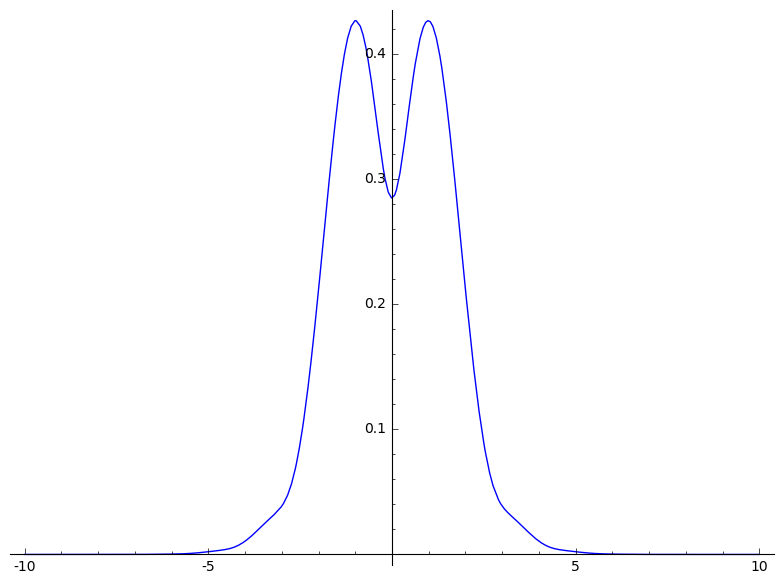

In [20]:
plot(lambda u: abs(mellin_integrand(.5, 1/2 + u * I)), (-10, 10))

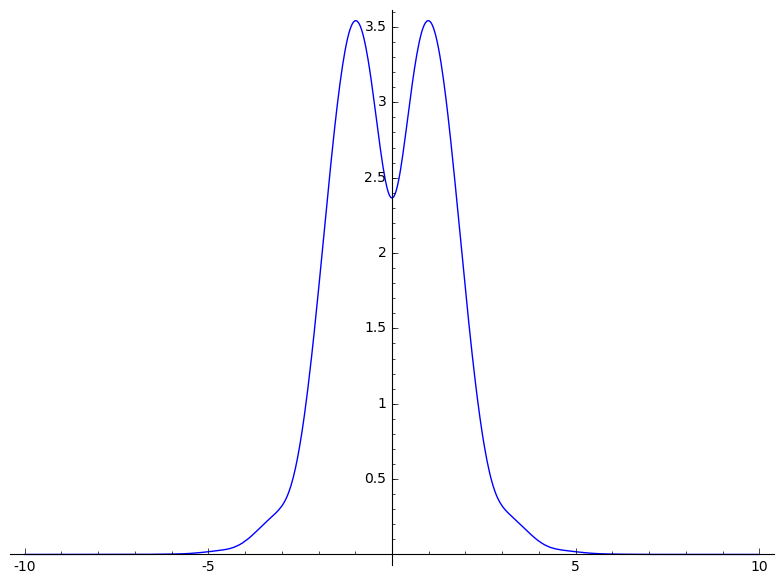

In [22]:
plot(lambda u: abs(mellin_integrand(.99, 1/2 + u * I)), (-10, 10))

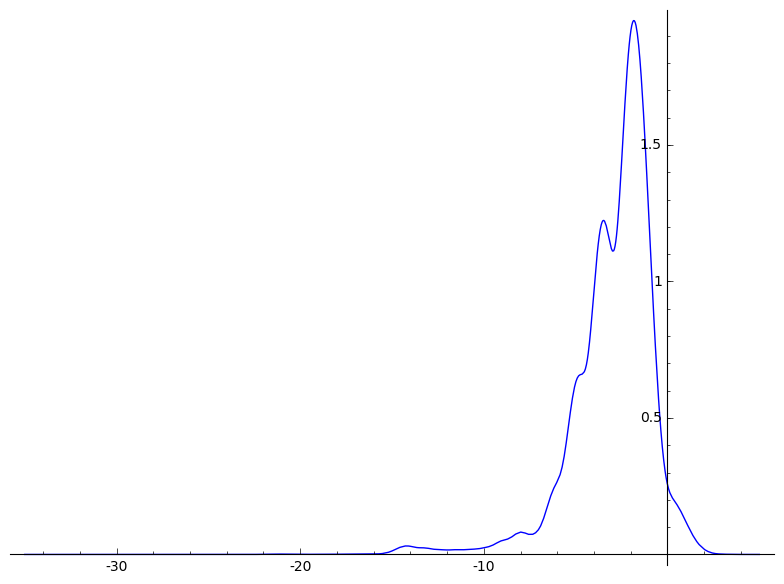

In [48]:
plot(lambda u: abs(mellin_integrand(0.5 + 0.5 * I, 1/2 + u * I)), (-35, 5))

In [34]:
mellin_integrand(-1, 1/2 + 1000 * I)

3.34063818830911e-710 + 3.55131893766132e-710*I

In [13]:
# This takes forever

# mellin_backward(1/exp(-2*pi/sqrt(389)), 1/2)